<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regularization**

In [0]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
print(tf.__version__)

2.2.0


## **Overfitting**

* A fundamental problem in machine learning is the possibility of overfitting training data and carrying the noise of that data through to the test set, thereby providing inaccurate generalizations. Overfitting is when you have a complicated model that gives worse predictions than a simpler model.
* Regularization is a technique for preventing a model from overfitting (e.g. preventing over-fitting by penalizing a model for having large weights).

**Regularization techniques against overfitting**

* Add more data,
* Vectornorm (L1, L2, Elastic Net) $^{1}$
* Dropout, 
* Jitter (add noise),
* Simpler model (reduce variance by taking into account fewer variables and parameters, thereby removing some of the noise in the training data), 
* Ensemble models, 
* Batch size (Small batches can oﬀer a regularizing eﬀect (Wilson and Martinez, 2003), perhaps due to the noise they add to the learning process) $^{2}$ 
* early stopping (this is not a formal regularization method, but can effectively limit overfitting). 

$^{1}$ *Traditional methods like cross-validation, stepwise regression to handle overfitting and perform feature selection work well with a small set of features but vectornorm regularization is a great alternative when dealing with a large set of features.*

$^{2}$
*Using a smaller batch size is like using some regularization to avoid converging to sharp minimizers. The gradients calculated with a small batch size are much more noisy than gradients calculated with large batch size, so it's easier for the model to escape from sharp minimizers, and thus leads to a better generalization. Generalization error is often best for a batch size of 1. Training with such a small batch size might require a small learning rate to maintain stability because of the high variance in the estimate of the gradient. The total runtime can be very high as a result of the need to make more steps, both because of the reduced learning rate and because it takes more steps to observe the entire training set.)*

**Overfitting: Variance-Bias-Tradeoff**

Generally, we refer to this model as having a large variance and a small bias. That is, the model is sensitive to the specific examples, the statistical noise, in the training dataset.

Source: [Regularization and Geometry](https://towardsdatascience.com/regularization-and-geometry-c69a2365de19) & [The Bias-Variance Tradeoff
](https://towardsdatascience.com/the-bias-variance-tradeoff-8818f41e39e9)

**Benefits of regularization from a mathematical optimization point of view**

* Machine learning is an optimization problem, where we try to minimize a cost function to find optimal values for our model's parameter. Some machine learning models, like neural networks, have non-convex cost functions. Stationary points in these cost functions are problematic because numerical optimization schemes (like gradient descent) can easily get stuck, leading to poor results.
* Regularization can be used as a way of ‚convexifying‘ a non-convex cost function. The L2 regularizer, being an upward-facing convex function, can unflatten flat regions and curve up some stationary points without severely changing the minimum locations (e.g L2 regularized cost no longer has an issue with saddle points, as the region surrounding it has been curved upwards).
* Regularization can also help with the optimization of convex machine learning problems, when is not invertible. For example the solution to the L2 regularized version of linear regression is given by is the regularization parameter, which can be set large enough so that becomes invertible.

**Overfitting or Overtraining**

* [Mehmet Suzen](https://www.linkedin.com/in/mehmetsuzen/): Regularisation does not prevent overfitting or even reduces. Regularisation originally developed for reducing ill-conditioning in inverse-problems. Regularisation, along with early-stopping, cross-validation and drop out, reduces and provides a reliable measure for generalisation error. Overfitting, on the other hand, is about the 'fit' , i.e., the model complexity. In deep nets, model complexity correlates with the full architecture and the activation functions. This is called 'overtraining' ([IEEE](https://ieeexplore.ieee.org/document/623200)).
* Answer: if let it be, the learning process "will tend to learn more and more complex functions as the number of iterations increases". A model represented by a more complex function, thus having poor generalization, is an overfitting model. From the statement above, such a model can be prevented by stopping the learning early (among other techniques). Regularization is a process of applying those techniques. 

## **Vectornorm**

Source: ['Getting started with Regression'](https://medium.com/@savannahar68/getting-started-with-regression-a39aca03b75f)

**Theoretical Foundation** 

Modify cost function J by adding 'preference' to certain parameter values:

$J(\underline{\theta})=\frac{1}{2}\left(\underline{y}-\underline{\theta} \underline{X}^{T}\right) \cdot\left(\underline{y}-\underline{\theta} \underline{X}^{T}\right)^{T}+\alpha \theta \theta^{T}$

New solution (derive the same way) - problem is now well-posed for any degree:

$\underline{\theta}=\underline{y} \underline{X}\left(\underline{X}^{T} \underline{X}+\alpha I\right)^{-1}$

* Shrinks parameters towards zero
* Alpha large: we prefer small theta to small MSE
* Regularization term is independent of the data: paying more attention reduces variance.

**Lambda Value (λ)**

* Lambda is a regularization hyperparameter
* Reasonable values of lambda range between 0 and 0.1
* L2 weight regularization with very small regularization hyperparameters such as (e.g. 0.0005 or 5 x 10^−4) may be a good starting point
* Learn more: [Google Course: Regularization for Simplicity: Lambda](https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/lambda)

**L1 Regularization**

<p>
$\sum_{i=1}^{n}\left|u_{i}\right|=\sum_{i=1}^{n}\left|y_{i}-b_{0}-b_{1} x_{i}\right|$
</p><br>


$d_{1} \equiv d_{\mathrm{SAD}}:(x, y) \mapsto\|x-y\|_{1}=\sum_{i=1}^{n}\left|x_{i}-y_{i}\right|$

* **Synonyms**: Lasso, Manhatten distance, least absolute deviations (LAD method), least absolute errors (LAE)
* **Fun Fact**: L1 Regularization is analytical equivalent to Laplacean prior
* **Summary**: Sum of the absolute weights. Gives sparse solutions, since it does not take all features. Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.
* **Advantages**: less influenced by outliers (robust). Can shrink some coefficients to zero while lambda increases, performing variable selection. generates sparse feature vectors (Sparse: only very few entries in a matrix or vector is non-zero. L1-norm has property of producing many coefficients with zero values or very small values with few large coefficients). Sparse is sometimes good eg. in high dimensional classification problems. sparsity properties: calculation more computationally efficient.
* **Disadvantages**: L1 regularization doesn’t easily work with all forms of training. gives a solution with more large residuals, and a lot of zeros in the solution.
* **Use Cases**: if only a subset of features are correlated with the label, as in lasso model some coefficient can be shrunken to zero. very useful when you want to understand exactly which features are contributing to a decision. if you can ignore the ouliers in your dataset or you need them to be there. use L1 when constraints on feature extraction: easily avoid computing a lot of computationally expensive features  at the cost of some of the accuracy, since the L1-norm will give us a solution which has the weights for a large set of features set to zero (real-time detection or tracking of an object/face/material using a set of diverse handcrafted features with a large margin classifier like an SVM in a sliding window fashion - you'd probably want feature computation to be as fast as possible in this case).
* **Bayesian**: L1 usually corresponds to setting a Laplacean prior: Some of the coefficients will shrink to zero: similar effect would be achieved in Bayesian linear regression using a Laplacian prior (strongly peaked at zero) on each of the beta coefficients.



**Add L1 (Lasso) Penalty Term to Cost Function**

$\sum_{i=1}^{n}\left(Y_{i}-\sum_{j=1}^{p} X_{i j} \beta_{j}\right)^{2}+\lambda \sum_{j=1}^{p}\left|\beta_{j}\right|$

* Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.
* If lambda is zero then we will get back OLS whereas very large value will make coefficients zero hence it will under-fit.

**L2 Regularization**

<p>
$\sum_{i=1}^{n} u_{i}^{2}=\sum_{i=1}^{n}\left(y_{i}-b_{0}-b_{1} x_{i}\right)^{2}$
</p><br>

* **Synonyms**: Weight Decay, Ridge Regression, KQ-Methode, kleinste Quadrate, [Tikhonov regularization](https://en.m.wikipedia.org/wiki/Tikhonov_regularization), Euclidean distance, least squares error (LSE)
* **Fun Fact**: L2 Regularization is analytically equivalent to Gaussian prior
* **Summary**: Sum of the squared weights. Is the most common type of regularization, also called simply “weight decay,” with values often on a logarithmic scale between 0 and 0.1, such as 0.1, 0.001, 0.0001, etc.
* **Advantages**: Shrinks all the coefficient by the same proportions, but eliminates none. Leads to small distributed weights in neural networks. The L2 regularization heavily penalizes "peaky" weight vectors and prefers diffuse weight vectors. Empirically performs better than L1. The fit for L2 will be more precise than L1. Works with all forms of training. Smoother: fewer large residual values along with fewer very small residuals as well. L2-norm has analytical solution - allows the L2-norm solutions to be calculated computationally efficiently.
* **Disadvantages**: Sensitive to outliers, since L2 wants all errors to be tiny and heavily penalizes anyone who doesn't obey. Computation heavy compared to the L1 norm. Doesn’t give you implicit feature selection.
* **Use Cases**: Use ridge if all the features are correlated with the label, as the coefficients are never zero in ridge. 
* **Bayesian**: L2 similarly corresponds to Gaussian prior. As one moves away from zero, the probability for such a coefficient grows progressively smaller. The square loss penalty can be seen as putting a Gaussian prior on your weights.


**Add L2 (Ridge) Penalty Term to Cost Function**

$\sum_{i=1}^{n}\left(y_{i}-\sum_{j=1}^{p} x_{i j} \beta_{j}\right)^{2}+\lambda \sum_{j=1}^{p} \beta_{j}^{2}$

* Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function.
* If lambda is zero then you can imagine we get back OLS. However, if lambda is very large then it will add too much weight and it will lead to under-fitting. Having said that it’s important how lambda is chosen.

**Elastic Net**

* Method that linearly combines the L1 and L2 penalties of the lasso and ridge methods, at the "only" cost of introducing another hyperparameter to tune (see Hastie's paper on stanford.edu).
* Overcome limitations of L1: in the "large p, small n" case (high-dimensional data with few examples), the LASSO selects at most n variables before it saturates. Also if there is a group of highly correlated variables, then the LASSO tends to select one variable from a group and ignore the others.
* Solution in elastic net: add quadratic part to penalty (L2). quadratic penalty term makes the loss function strictly convex, and it therefore has a unique minimum.
* Naive version of elastic net method finds an estimator in a two-stage procedure : first for each fixed λ2 it finds the ridge regression coefficients, and then does a LASSO type shrinkage. This kind of estimation incurs a double amount of shrinkage, which leads to increased bias and poor predictions. To improve the prediction performance, the authors rescale the coefficients of the naive version of elastic net by multiplying the estimated coefficients by (1+λ2).

**Special: Analytical Equivalence**

Why is L2 Regularization is analytically equivalent to Gaussian prior?


https://stats.stackexchange.com/questions/163388/why-is-the-l2-regularization-equivalent-to-gaussian-prior/163450#163450


**Weight Regularization**

* Weight regularization was borrowed from penalized regression models in statistics. Neural networks learn a set of weights that best map inputs to outputs. 
* A network with large network weights can be a sign of an unstable network where small changes in the input can lead to large changes in the output. This can be a sign that the network has overfit the training dataset and will likely perform poorly when making predictions on new data. 
* A solution to this problem is to update the learning algorithm to encourage the network to keep the weights small. This is called weight regularization and it can be used as a general technique to reduce overfitting of the training dataset and improve the generalization of the model.


## **Dropout**

**What is it and how it works?**

* Ziel: Overfitting vermeiden
* Dropout forces a neural network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.
* Dropout roughly doubles the number of iterations required to converge. However, training time for each epoch is less. With H hidden units, each of which can be dropped, we have 2^H possible models. In testing phase, the entire network is considered and each activation is reduced by a factor p.
At test time the whole network is used (all units) but with scaled down weights. Mathematically this approximates ensemble averaging (using the geometric mean as average). Two papers that explain this much better are:
* Hinton et al, [1207.0580] Improving neural networks by preventing co-adaptation of feature detectors, 2012 (probably the original paper on dropout)
* Warde-Farley et al, [1312.6197] An empirical analysis of dropout in piecewise linear networks, 2014 (analyzes dropout specially for the case of using ReLU as activation function -arguably the most popular- , and checks the behavior of the geometric mean for ensemble averaging).
* Andrew Ng: dropout is nothing more than an adaptive form of L2 regularization and that both methods have similar effects
* The dropout will randomly mute some neurons in the neural network and we therefore have a sparse network which hugely decreases the possibility of overfitting. More importantly, the dropout will make the weights spread over the input features instead of focusing on some features. https://hackernoon.com/is-the-braess-paradox-related-to-dropout-in-neural-nets-270ecb97cdeb https://de.m.wikipedia.org/wiki/Dropout_(künstliches_neuronales_Netz)

**Is dropout outdated?**

Neural Network:  Dropout

https://medium.com/@bingobee01/a-review-of-dropout-as-applied-to-rnns-72e79ecd5b7b

Don’t Use Dropout in Convolutional Networks
https://towardsdatascience.com/dont-use-dropout-in-convolutional-networks-81486c823c16

Instead you should insert batch normalization between your convolutions. This will regularize your model, as well as make your model more stable during training.

First, dropout is generally less effective at regularizing convolutional layers: The reason? Since convolutional layers have few parameters, they need less regularization to begin with. Furthermore, because of the spatial relationships encoded in feature maps, activations can become highly correlated. This renders dropout ineffective. ([Source](https://www.reddit.com/r/MachineLearning/comments/5l3f1c/d_what_happened_to_dropout/))

Second, what dropout is good at regularizing is becoming outdated: Large models like VGG16 included fully connected layers at the end of the network. For models like this, overfitting was combatted by including dropout between fully connected layers. Unfortunately, [recent architectures](https://arxiv.org/pdf/1512.03385.pdf) move away from this fully-connected block. By replacing dense layers with global average pooling, modern convnets have reduced model size while improving performance.

**Use Dropout along with L1/L2 Regularization?**

* You can, but it is still not clear whether using both at the same time acts synergistically or rather makes things more complicated for no net gain.
* While ℓ 2 regularization is implemented with a clearly-defined penalty term, dropout requires a random process of “switching off” some units, which cannot be coherently expressed as a penalty term and therefore cannot be analyzed other than experimentally.
* they both try to avoid the network’s over-reliance on spurious correlations, which are one of the consequences of overtraining that wreaks havoc with generalization. But more detailed research is necessary to determine whether and when they can “work together” or rather end up “fighting each other”. So far, it seems the results tend to vary in a case-by-case fashion. Using both can increase accuracy: https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf (Hinton paper 2014) 

# **TensorFlow Model**

**Load & Transform Data**

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

**Kernel Regularizer**

*Regularizer function applied to the kernel weights matrix.*

In [0]:
kernel_regularizer=tf.keras.regularizers.l1(l=0.0005)

In [0]:
kernel_regularizer=tf.keras.regularizers.l2(l=0.0005)

In [0]:
kernel_regularizer=None

**Bias Regularizer**

*Regularizer function applied to the bias vector*

In [0]:
bias_regularizer=tf.keras.regularizers.l1(l=0.0005)

In [0]:
bias_regularizer=tf.keras.regularizers.l2(l=0.0005)

In [0]:
bias_regularizer=None

**Activity Regularizer**

*Regularizer function applied to the output of the layer (its "activation")*

In [0]:
activity_regularizer=tf.keras.regularizers.l1(l=0.0005)

In [0]:
activity_regularizer=tf.keras.regularizers.l2(l=0.0005)

In [0]:
activity_regularizer=None

**Select Dropout Rate**

In [0]:
dropout = 0.3

**Select Loss ([Cost Function](https://www.tensorflow.org/api_docs/python/tf/keras/losses/))**

In [0]:
loss = 'sparse_categorical_crossentropy'

In [0]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
loss = 'mae'

**Select Activation function**

* activation function als Dense parameter. 
* activation layer als eigener layer.
* keras.activation = functions
keras.layers = layers

In [0]:
activation = tf.keras.activations.tanh

In [0]:
activation = tf.keras.activations.sigmoid

In [0]:
activation = tf.keras.layers.ReLU(max_value=None,
                                 negative_slope=0,
                                 threshold=0)

In [0]:
activation = tf.keras.layers.LeakyReLU(alpha=0.3)

In [0]:
activation = tf.keras.layers.Softmax(axis=-1)

In [0]:
# Alternatively add default settings

activation = 'relu'
# activation = 'linear'
# activation = 'sigmoid'
# activation = 'tanh'
# activation = 'softmax'

**Define Model & Run**

In [0]:
!pip install livelossplot --quiet
from livelossplot import PlotLossesKerasTF

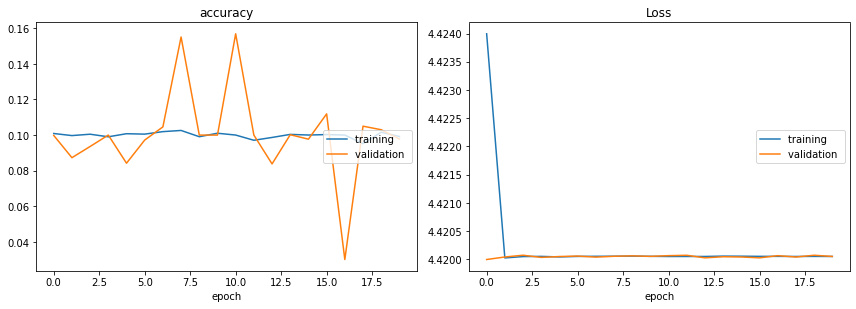

accuracy
	training         	 (min:    0.095, max:    0.811, cur:    0.099)
	validation       	 (min:    0.030, max:    0.822, cur:    0.098)
Loss
	training         	 (min:    0.804, max:    4.424, cur:    4.420)
	validation       	 (min:    0.766, max:    4.420, cur:    4.420)
1875/1875 [==============================] - 8s 4ms/step - loss: 4.4201 - accuracy: 0.0992 - val_loss: 4.4201 - val_accuracy: 0.0978


In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation='relu', 
                                kernel_regularizer=kernel_regularizer, 
                                bias_regularizer=bias_regularizer, 
                                activity_regularizer=activity_regularizer))
model.add(tf.keras.layers.Dropout(dropout))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', 
              loss=loss, 
              metrics=['accuracy'])
model.fit(x=x_train, 
          y=y_train, 
          epochs=20, 
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKerasTF()],
          verbose=1)